<a href="https://colab.research.google.com/github/zzhining/python_ml_dl/blob/main/%5C5%EC%9E%A5%5C5_2_%EC%8B%A4%EC%8A%B5_%EB%B6%93%EA%BD%83%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B5%B0%EC%A7%91%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.2 실습: 붓꽃 데이터 군집(K-means) 모델


* **분석데이터**:
  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

## 5.2.1 문제 정의 및 데이터 분할

### 라이브러리 로딩

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

X = iris_df.iloc[:, :4]

In [2]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
y_preds = kmeans_3.fit_predict(X)

iris_df['y_preds(3 Group)'] = y_preds
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,y_preds(3 Group)
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [3]:
iris_df.groupby([ 'y_preds(3 Group)','label'])['sepal length (cm)'].count()

y_preds(3 Group)  label
0                 1        48
                  2        14
1                 0        50
2                 1         2
                  2        36
Name: sepal length (cm), dtype: int64

In [4]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
y_preds = kmeans_2.fit_predict(X)

iris_df['y_preds(2 Group)'] = y_preds
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,y_preds(3 Group),y_preds(2 Group)
0,5.1,3.5,1.4,0.2,0,1,1
1,4.9,3.0,1.4,0.2,0,1,1
2,4.7,3.2,1.3,0.2,0,1,1
3,4.6,3.1,1.5,0.2,0,1,1
4,5.0,3.6,1.4,0.2,0,1,1


In [5]:
iris_df.groupby(['label', 'y_preds(2 Group)'])['sepal length (cm)'].count()

label  y_preds(2 Group)
0      1                   50
1      0                   47
       1                    3
2      0                   50
Name: sepal length (cm), dtype: int64

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3D(x, y, z, category, title) :
    axes3d = Axes3D(plt.figure(figsize=(4, 3))) 
    axes3d.scatter(xs = x, ys = y, zs = z, c = category)
    axes3d.set_title(title)

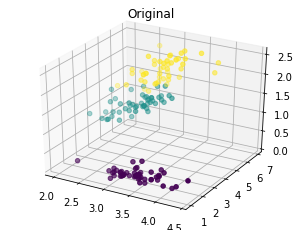

In [7]:
cols = iris_df.columns
plot3D(iris_df[cols[1]], iris_df[cols[2]], iris_df[cols[3]], iris_df['label'], 'Original')

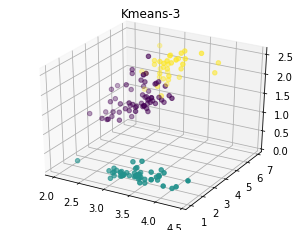

In [8]:
plot3D(iris_df[cols[1]], iris_df[cols[2]], iris_df[cols[3]], iris_df['y_preds(3 Group)'], 'Kmeans-3')

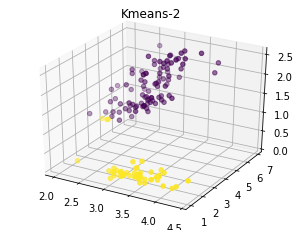

In [9]:
plot3D(iris_df[cols[1]], iris_df[cols[2]], iris_df[cols[3]], iris_df['y_preds(2 Group)'], 'Kmeans-2')

## 5.2.3 평가 - 실루엣 점수

[silhouette_samples](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html?highlight=silhouette_samples)

[silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette_score)

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

print('실루엣 점수: {0:.4f}'.format(silhouette_score(X, y_preds))) 

실루엣 점수: 0.6810


In [11]:
iris_df['silhouette'] = silhouette_samples(X, y_preds)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,y_preds(3 Group),y_preds(2 Group),silhouette
0,5.1,3.5,1.4,0.2,0,1,1,0.852225
1,4.9,3.0,1.4,0.2,0,1,1,0.826916
2,4.7,3.2,1.3,0.2,0,1,1,0.835426
3,4.6,3.1,1.5,0.2,0,1,1,0.819249
4,5.0,3.6,1.4,0.2,0,1,1,0.848731


In [12]:
iris_df.groupby('y_preds(3 Group)')['silhouette'].mean()

y_preds(3 Group)
0    0.569348
1    0.809592
2    0.694151
Name: silhouette, dtype: float64

### Tip - 실루엣 계수의 시각화를 위한 코드

[원본코드](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)를 일부 수정하였습니다.  

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

def plotSilhouette(n_clusters, y_preds):   
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)
    y_lower = 10
    silhouette_avg = silhouette_score(X, y_preds)   
    sample_silhouette_values = silhouette_samples(X, y_preds)
    print("군집개수: {0}개, 평균 실루엣 점수: {1:.4f}".format(k, silhouette_avg))

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[y_preds == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the {0} clusters.".format(n_clusters))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

## 5.2.4 최적의 군집 수 찾기

In [14]:
k_list = [2, 3, 4, 5, 6]
X = iris.data

for k in k_list:
    model = KMeans(n_clusters= k, random_state=42)
    y_preds = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, y_preds)   
    sample_silhouette_values = silhouette_samples(X, y_preds)
    print("군집개수: {0}개, 평균 실루엣 점수: {1:.4f}".format(k, silhouette_avg))

군집개수: 2개, 평균 실루엣 점수: 0.6810
군집개수: 3개, 평균 실루엣 점수: 0.5528
군집개수: 4개, 평균 실루엣 점수: 0.4981
군집개수: 5개, 평균 실루엣 점수: 0.4887
군집개수: 6개, 평균 실루엣 점수: 0.3648


군집개수: 2개, 평균 실루엣 점수: 0.6810


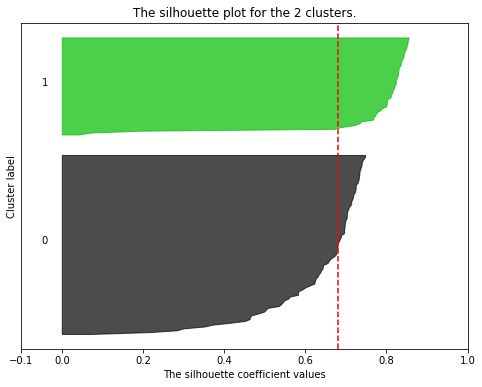

군집개수: 3개, 평균 실루엣 점수: 0.5528


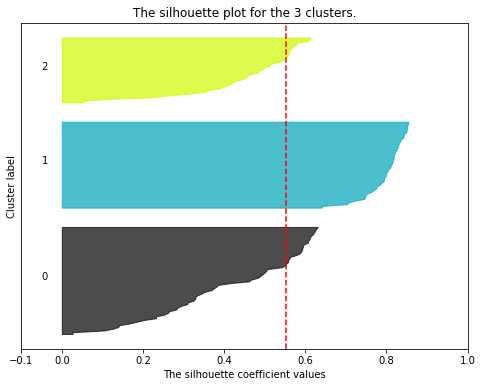

군집개수: 4개, 평균 실루엣 점수: 0.4981


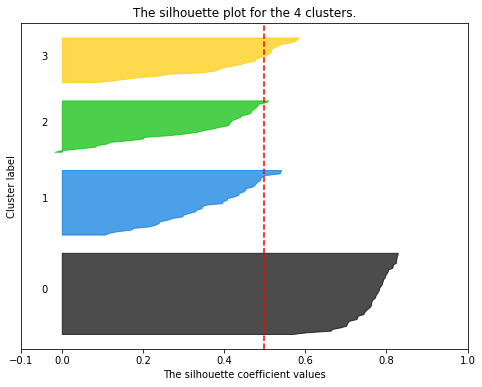

군집개수: 5개, 평균 실루엣 점수: 0.4887


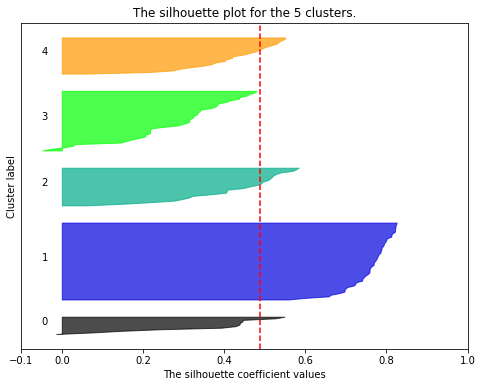

군집개수: 6개, 평균 실루엣 점수: 0.3648


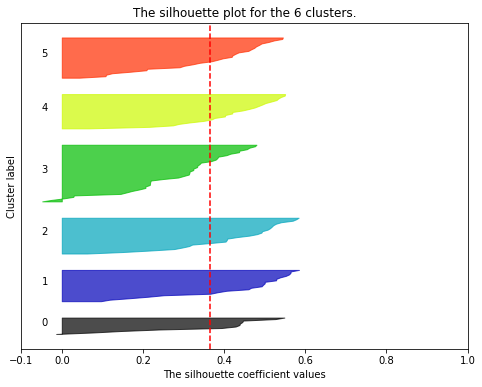

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

k_list = [2, 3, 4, 5, 6]
X = iris.data

for k in k_list:
    model = KMeans(n_clusters= k, random_state=42)
    y_preds = model.fit_predict(X)
    plotSilhouette(k, y_preds)